In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ahu01 = pd.read_csv('AHU_17.csv',low_memory =False)
ahu01 = ahu01.ffill()
ahu01.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20
0,31-12-2015,00:00:00,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,158.1,2.0,76.7,0.0,0,782.82
1,31-12-2015,00:01:53,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,158.1,2.0,76.7,0.0,0,782.82
2,31-12-2015,00:02:27,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,163.3,2.0,76.7,0.0,0,782.82
3,31-12-2015,00:02:37,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,163.3,2.0,76.7,0.0,0,782.82
4,31-12-2015,00:02:51,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,163.3,2.0,76.7,0.0,0,782.82


In [7]:
ahu01.rename(columns={'Column1': 'Date', 'Column2': 'Time', 'Column3':'Return fan ON?OFF', 'Column4' : 'Supply fan ON?OFF',
                      'Column5': 'Cooling coil valve %open', 'Column6': 'Discharge static pressure', 
                      'Column7':'DX coil 1 ON?OFF', 'Column8' : 'DX coil 2 ON?OFF','Column9': ' ON?OFF', 
                      'Column10': 'Kilowatt demand', 'Column11':'Kilowatt Hours', 'Column12' : 'Load',
                      'Column13': 'Mixed air damper % open', 'Column14': 'Mixed Air damper minimum %', 'Column15':'Mixed air temperature',
                      'Column16': 'Pre-heat coil discharger valve', 'Column17': 'return air temperature', 'Column18':'Return fan VFD speed',
                      'Column19': 'Supply fan VFD speed', 'Column20': 'Total demand Kilowatts'},inplace=True)

In [8]:
ahu01.head()

,Date,Time,Return fan ON?OFF,Supply fan ON?OFF,Cooling coil valve %open,Discharge static pressure,DX coil 1 ON?OFF,DX coil 2 ON?OFF,ON?OFF,Kilowatt demand,Kilowatt Hours,Load,Mixed air damper % open,Mixed Air damper minimum %,Mixed air temperature,Pre-heat coil discharger valve,return air temperature,Return fan VFD speed,Supply fan VFD speed,Total demand Kilowatts
0,31-12-2015,00:00:00,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,158.1,2.0,76.7,0.0,0,782.82
1,31-12-2015,00:01:53,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,158.1,2.0,76.7,0.0,0,782.82
2,31-12-2015,00:02:27,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,163.3,2.0,76.7,0.0,0,782.82
3,31-12-2015,00:02:37,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,163.3,2.0,76.7,0.0,0,782.82
4,31-12-2015,00:02:51,ON,ON,0.0,0.03,OFF,OFF,OFF,0.0,156303.36,28.14,0.0,0.0,163.3,2.0,76.7,0.0,0,782.82


In [13]:
sup_on = ahu01[ahu01['Supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu01[ahu01['Supply fan ON?OFF'].str.contains('OFF')]
data_temp = [ahu01['return air temperature'],ahu01['Mixed air temperature']]
data_temp_1 = [sup_on['return air temperature'],sup_on['Mixed air temperature']]
data_temp_2 = [sup_off['return air temperature'],sup_off['Mixed air temperature']]

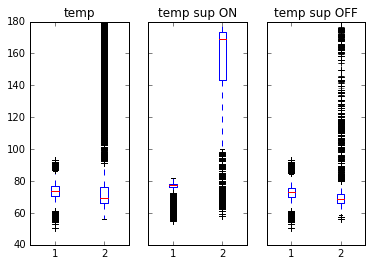

In [14]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax1.boxplot(data_temp)
ax2.boxplot(data_temp_1)
ax3.boxplot(data_temp_2)
ax1.set_title('temp')
ax2.set_title('temp sup ON')
ax3.set_title('temp sup OFF')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_16']))

In [18]:
ahu01['Cooling coil valve %open'] = pd.to_numeric(ahu01['Cooling coil valve %open'],errors='coerce')
ahu01['Discharge static pressure'] = pd.to_numeric(ahu01['Discharge static pressure'],errors='coerce')
ahu01['Mixed air damper % open'] = pd.to_numeric(ahu01['Mixed air damper % open'],errors='coerce')
ahu01['Pre-heat coil discharger valve'] = pd.to_numeric(ahu01['Pre-heat coil discharger valve'],errors='coerce')
ahu01['Return fan VFD speed'] = pd.to_numeric(ahu01['Return fan VFD speed'],errors='coerce')
ahu01['Supply fan VFD speed'] = pd.to_numeric(ahu01['Supply fan VFD speed'],errors='coerce')
ahu01['Total demand Kilowatts'] = pd.to_numeric(ahu01['Total demand Kilowatts'],errors='coerce')

C:\Users\MisraSN-PC\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


{'boxes': [<matplotlib.lines.Line2D at 0xa539c18>,
 'caps': [<matplotlib.lines.Line2D at 0xa962fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0xe9b4ef0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xe9b4f28>,
 'whiskers': [<matplotlib.lines.Line2D at 0xa958ac8>,
  <matplotlib.lines.Line2D at 0xe2eab70>]}

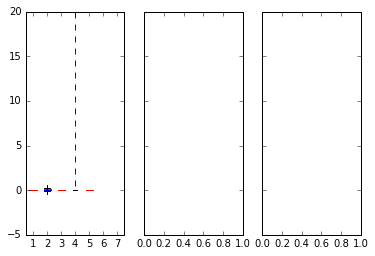

In [19]:
data_value = [ahu01['Cooling coil valve %open'],ahu01['Discharge static pressure'],ahu01['Mixed air damper % open'],
              ahu01['Pre-heat coil discharger valve'],ahu01['Return fan VFD speed'],ahu01['Supply fan VFD speed'],
              ahu01['Total demand Kilowatts']]
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax1.boxplot(data_value)